# VARLiNGAM

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import os
os.environ["PATH"] += os.pathsep + '/Users/elena/opt/anaconda3/lib/python3.7/site-packages/graphviz'

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.17.2', '0.25.1', '0.14', '1.2.1']


## Test data
We create test data consisting of 5 variables.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('/Users/elena/Documents/Диплом/Data/russia.csv')

In [6]:
df.columns

Index(['x6', 'dlngdp', 'x4', 'x9', 'x5', 'x1', 'x7', 'x11', 'gdp', 'x2', 'x10',
       'x8', 'x3', 'temp', 'id', 'country', 'time', 'lnx1', 'lnx2', 'lntr',
       'lnco2', 'lnmc', 'lncp', 'lnfa', 'lnen', 'lngdp'],
      dtype='object')

In [7]:
df['dlnCO2'] = df['lnco2'].diff()
df['dlnEn'] = df['lnen'].diff()
df['dlnx1'] = df['lnx1'].diff()
df['dlnx2'] = df['lnx2'].diff()
df['dlnTr'] = df['lntr'].diff()
df['dlnMC'] = df['lnmc'].diff()
df['dlnFA'] = df['lnfa'].diff()
df['dlnCP'] = df['lncp'].diff()

In [8]:
X_raw = df[['temp', 'dlngdp', 'dlnCO2', 'dlnEn', 'dlnTr', 'dlnMC', 'dlnFA']]

In [9]:
X_raw

,temp,dlngdp,dlnCO2,dlnEn,dlnTr,dlnMC,dlnFA
0,-6.11068,0.034353,NaN,NaN,NaN,NaN,NaN
1,-5.71303,-0.075590,-0.068704,-0.064830,-0.090092,-0.050997,0.000269
2,-6.10001,-0.109830,-0.130972,-0.097810,-0.009272,-0.079388,0.000335
3,-4.28530,-0.019660,-0.040459,-0.017328,-0.050391,0.285555,0.000220
4,-5.84359,-0.026030,-0.009954,-0.016824,-0.033485,-0.113912,0.000065
5,-5.42981,0.017866,-0.053764,-0.016243,-0.012897,-0.009157,-0.000003
6,-6.49114,-0.337210,-0.018538,-0.017906,0.170542,-0.103054,-0.000122
7,-5.98445,-0.285060,0.026636,0.030633,-0.017162,0.036506,-0.000401
8,-5.67297,0.302158,0.021538,0.039148,-0.067484,0.128820,0.000477
9,-5.63369,0.160126,0.003990,0.014507,0.033460,-0.047830,-0.000063


In [10]:
standard_scaler = StandardScaler(with_std=False)
X = standard_scaler.fit_transform(X_raw)

In [11]:
#X = np.array(df[['temp', 'lnGDP', 'lnCO2', 'lnEn']])

In [12]:
# B0 = [
#     [0,-0.12,0,0,0],
#     [0,0,0,0,0],
#     [-0.41,0.01,0,-0.02,0],
#     [0.04,-0.22,0,0,0],
#     [0.15,0,-0.03,0,0],
# ]
# B1 = [
#     [-0.32,0,0.12,0.32,0],
#     [0,-0.35,-0.1,-0.46,0.4],
#     [0,0,0.37,0,0.46],
#     [-0.38,-0.1,-0.24,0,-0.13],
#     [0,0,0,0,0],
#  ]
causal_order = [2, 1, 1, 1, 0, 0, 1]

# data generated from B0 and B1
#X = pd.read_csv('data/sample_data_var_lingam.csv')

## Causal Discovery
To run causal discovery, we create a `VARLiNGAM` object and call the `fit` method.

In [13]:
model = lingam.VARLiNGAM()
model.fit(X[1:])

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [14]:
model.causal_order_

[6, 3, 2, 5, 4, 1, 0]

Also, using the `adjacency_matrices_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [15]:
model.adjacency_matrices_

array([[[0.   , 1.094, 0.   , 0.   , 0.   , 3.199, 0.   ],
        [0.   , 0.   , 0.826, 1.416, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 1.073, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]]])

In [16]:
# B0
model.adjacency_matrices_[0]

array([[0.   , 1.094, 0.   , 0.   , 0.   , 3.199, 0.   ],
       [0.   , 0.   , 0.826, 1.416, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.073, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

In [17]:
# B1
model.adjacency_matrices_[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

We can draw a causal graph by utility funciton.

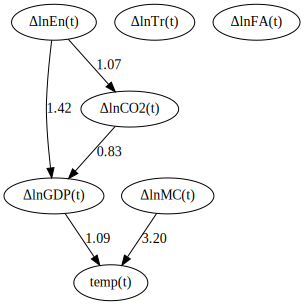

In [18]:
labels = ['temp(t)', 'ΔlnGDP(t)', 'ΔlnCO2(t)', 'ΔlnEn(t)', 'ΔlnTr(t)', 'ΔlnMC(t)', 'ΔlnFA(t)']
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.6, labels=labels)

## Bootstrap

### Bootstrapping
We call `bootstrap()` method instead of `fit()`. Here, the second argument specifies the number of bootstrap sampling.

In [19]:
model = lingam.VARLiNGAM()
result = model.bootstrap(X[1:], 100)

In [20]:
labels = ['temp(t)', 'Δlngdp(t)', 'ΔlnCO2(t)', 'ΔlnEn(t)', 'ΔlnTr(t)', 'ΔlnMC(t)', 'ΔlnFA(t)', 'temp(t-1)', 'Δlngdp(t-1)', 'ΔlnCO2(t-1)', 'ΔlnEn(t-1)', 'ΔlnTr(t-1)', 'ΔlnMC(t-1)', 'ΔlnFA(t-1)']

Since `BootstrapResult` object is returned, we can get the ranking of the causal directions extracted by `get_causal_direction_counts()` method. In the following sample code, `n_directions` option is limited to the causal directions of the top 8 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.3 or more.

In [257]:
cdc = result.get_causal_direction_counts(n_directions=50, min_causal_effect=1, split_by_causal_effect_sign=True)

We can check the result by utility function.

In [258]:
print_causal_directions(cdc, 100, labels=labels)

temp(t) <--- ΔlnFA(t-1) (b>0) (100.0%)
ΔlnTr(t) <--- ΔlnEn(t-1) (b>0) (99.0%)
ΔlnEn(t) <--- ΔlnFA(t-1) (b<0) (98.0%)
temp(t) <--- Δlngdp(t-1) (b>0) (98.0%)
Δlngdp(t) <--- ΔlnEn(t-1) (b>0) (98.0%)
ΔlnTr(t) <--- ΔlnCO2(t-1) (b<0) (97.0%)
ΔlnTr(t) <--- ΔlnFA(t-1) (b<0) (96.0%)
Δlngdp(t) <--- ΔlnTr(t-1) (b<0) (95.0%)
temp(t) <--- ΔlnTr(t-1) (b>0) (91.0%)
ΔlnMC(t) <--- ΔlnFA(t-1) (b>0) (89.0%)
temp(t) <--- ΔlnEn(t-1) (b<0) (84.0%)
temp(t) <--- ΔlnCO2(t-1) (b>0) (81.0%)
Δlngdp(t) <--- ΔlnCO2(t-1) (b<0) (61.0%)
Δlngdp(t) <--- ΔlnFA(t-1) (b<0) (52.0%)
ΔlnCO2(t) <--- ΔlnFA(t-1) (b>0) (50.0%)
Δlngdp(t) <--- ΔlnFA(t-1) (b>0) (48.0%)
Δlngdp(t) <--- ΔlnCO2(t) (b>0) (34.0%)
Δlngdp(t) <--- ΔlnFA(t) (b>0) (34.0%)
temp(t) <--- Δlngdp(t) (b>0) (33.0%)
ΔlnEn(t) <--- ΔlnEn(t-1) (b>0) (32.0%)
ΔlnMC(t) <--- ΔlnEn(t-1) (b>0) (24.0%)
temp(t) <--- ΔlnMC(t) (b>0) (23.0%)
Δlngdp(t) <--- ΔlnEn(t) (b>0) (19.0%)
temp(t) <--- ΔlnTr(t) (b<0) (19.0%)
temp(t) <--- ΔlnCO2(t-1) (b<0) (18.0%)
temp(t) <--- ΔlnMC(t-1) (b<0)

Also, using the `get_directed_acyclic_graph_counts()` method, we can get the ranking of the DAGs extracted. In the following sample code, `n_dags` option is limited to the dags of the top 3 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.2 or more.

In [192]:
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.3, split_by_causal_effect_sign=True)

We can check the result by utility function.

In [193]:
print_dagc(dagc, 100, labels=labels)

DAG[0]: 5.0%
	temp(t) <--- Δlngdp(t-1) (b>0)
	temp(t) <--- ΔlnCO2(t-1) (b>0)
	temp(t) <--- ΔlnEn(t-1) (b<0)
	temp(t) <--- ΔlnTr(t-1) (b>0)
	temp(t) <--- ΔlnFA(t-1) (b>0)
	Δlngdp(t) <--- ΔlnCO2(t) (b>0)
	Δlngdp(t) <--- ΔlnCO2(t-1) (b<0)
	Δlngdp(t) <--- ΔlnEn(t-1) (b>0)
	Δlngdp(t) <--- ΔlnTr(t-1) (b<0)
	Δlngdp(t) <--- ΔlnMC(t-1) (b<0)
	Δlngdp(t) <--- ΔlnFA(t-1) (b<0)
	ΔlnCO2(t) <--- ΔlnEn(t-1) (b>0)
	ΔlnCO2(t) <--- ΔlnFA(t-1) (b<0)
	ΔlnEn(t) <--- ΔlnCO2(t) (b>0)
	ΔlnEn(t) <--- ΔlnCO2(t-1) (b<0)
	ΔlnEn(t) <--- ΔlnEn(t-1) (b>0)
	ΔlnEn(t) <--- ΔlnFA(t-1) (b<0)
	ΔlnTr(t) <--- ΔlnCO2(t-1) (b<0)
	ΔlnTr(t) <--- ΔlnEn(t-1) (b>0)
	ΔlnTr(t) <--- ΔlnMC(t-1) (b<0)
	ΔlnTr(t) <--- ΔlnFA(t-1) (b<0)
	ΔlnMC(t) <--- ΔlnCO2(t-1) (b<0)
	ΔlnMC(t) <--- ΔlnEn(t-1) (b>0)
	ΔlnMC(t) <--- ΔlnMC(t-1) (b<0)
	ΔlnMC(t) <--- ΔlnFA(t-1) (b>0)
	ΔlnFA(t) <--- ΔlnFA(t-1) (b>0)
DAG[1]: 2.0%
	temp(t) <--- Δlngdp(t-1) (b>0)
	temp(t) <--- ΔlnCO2(t-1) (b>0)
	temp(t) <--- ΔlnEn(t-1) (b<0)
	temp(t) <--- ΔlnTr(t-1) (b>0)
	temp(t) 

Using the `get_probabilities()` method, we can get the probability of bootstrapping.

In [162]:
prob = result.get_probabilities(min_causal_effect=0.1)
print('Probability of B0:\n', prob[0])
print('Probability of B1:\n', prob[1])

Probability of B0:
 [[0.   0.47 0.06 0.05 0.09 0.35 0.18 0.21]
 [0.3  0.   0.38 0.23 0.02 0.01 0.28 0.22]
 [0.   0.06 0.   0.56 0.01 0.04 0.01 0.  ]
 [0.   0.01 0.44 0.   0.01 0.04 0.05 0.02]
 [0.   0.   0.02 0.05 0.   0.12 0.12 0.06]
 [0.04 0.05 0.08 0.05 0.12 0.   0.05 0.05]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.06 0.18 0.01 0.01 0.07 0.03 0.02 0.  ]]
Probability of B1:
 [[0.87 1.   0.99 1.   0.99 0.63 1.   0.89]
 [0.04 0.75 0.99 1.   1.   0.89 1.   0.94]
 [0.   0.   0.96 0.83 0.66 0.97 0.99 0.  ]
 [0.   0.   1.   1.   0.61 0.02 1.   0.  ]
 [0.   0.   1.   1.   0.78 1.   1.   0.  ]
 [0.   0.27 1.   0.99 0.77 1.   1.   0.02]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.32 0.99 0.98 0.9  0.98 1.   1.  ]]
